### 神经网络 softmax 函数 多元分类

多元分类问题和二元分类(逻辑回归)类似，区别在于用 softmax 函数替代 sigmoid 函数。
其神经网络要求输入层的神经元数目与所需分类的类别数保持一致，假设分类的类别数为 k, 那么 softmax 函数需要输入 k 个值，然后输出 k 个概率(概率和为 1);
softmax 函数实际上是 sigmoid 函数的推广

In [1]:
import torch
import numpy as np
from torch import nn, optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
cluster = torch.ones(500, 2)

In [3]:
# 4为均值，2为标准差
data0 = torch.normal(4*cluster, 2)
# -4为均值，1为标准差
data1 = torch.normal(-4*cluster, 1)
# -8为均值，1为标准差
data2 = torch.normal(-8*cluster, 1)

# 类标签 0
label0 = torch.zeros(500)
# 类标签 1
label1 = torch.ones(500)
# 类标签 2
label2 = label1 * 2

In [4]:
# 类值合并
x = torch.cat((data0, data1, data2))
# 类标签合并
y = torch.cat((label0, label1, label2))
# 类、标签合并
x = torch.cat((x, torch.unsqueeze(y, dim=1)), dim=1)
#　洗牌
np.random.shuffle(x.numpy())

In [5]:
x

tensor([[-4.5027, -5.1589,  1.0000],
        [-2.6611, -1.5593,  1.0000],
        [-4.1013, -3.6610,  1.0000],
        ...,
        [-4.4801, -3.4452,  1.0000],
        [-2.7873, -4.0601,  1.0000],
        [-5.1977, -6.8702,  1.0000]])

In [6]:
# 前两列输入
inputs = torch.tensor(x.numpy()[:,0:2])
# 最后一列输出
target = torch.tensor(x.numpy()[:,2]).type(torch.LongTensor)

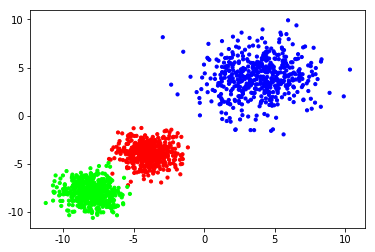

In [7]:
plt.scatter(inputs.numpy()[:,0], inputs.numpy()[:,1], c=target.numpy(), s=10, cmap='brg')

In [8]:
class Net(nn.Module):
    def __init__(self, inputs_n, hidden_n, outputs_n):
        super(Net, self).__init__()
        self.hidden = nn.Linear(inputs_n, hidden_n)
        # 本处分３类所以 outputs_n=3
        self.out = nn.Linear(hidden_n, outputs_n)
    
    def forward(self, x):
        # relu 让神经网络增加非线性功能
        x = F.relu(self.hidden(x))
        x = self.out(x)
        # 在最后将３个类的分数输出为概率的形式
        x = F.softmax(x)
        return x

In [14]:
def train(inputs, target, model, epochs=1, lr=0.02):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 40 == 0:
            draw(inputs, target, output)
    return model, loss, output

def draw(inputs, target, output):
    plt.cla()
    output = torch.max((output), 1)[1]
    pred_y = output.numpy()
    target_y = target.numpy()
    plt.scatter(inputs.numpy()[:,0], inputs.numpy()[:,1], c=pred_y, s=10, cmap='brg')
    accuracy = sum(pred_y == target_y) / pred_y.size
    plt.text(1.5, -4, 'Accuracy=%s' % (accuracy), fontdict={'size':20, 'color': 'red'})
    plt.pause(0.05)

In [15]:
model = Net(inputs.numpy().shape[1], 20, 3)

/home/qyd/miniconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


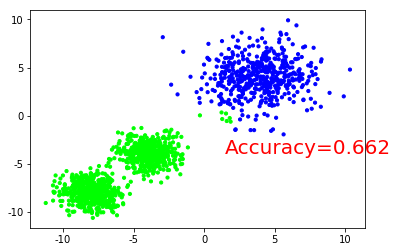

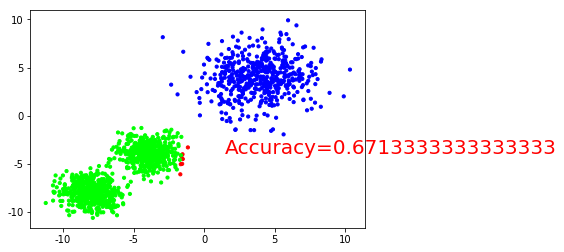

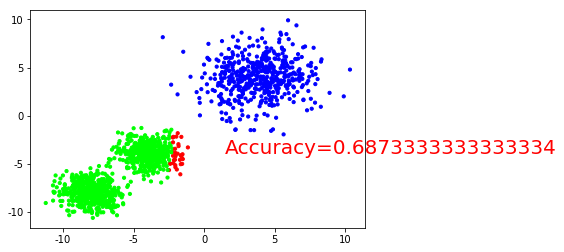

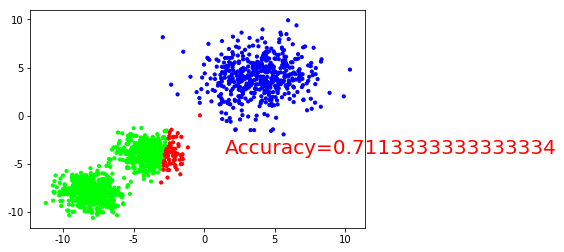

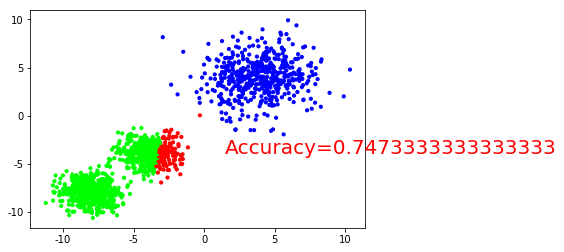

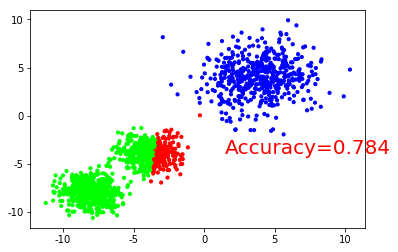

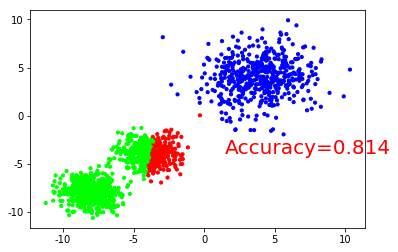

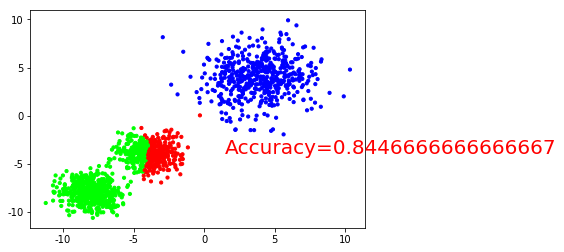

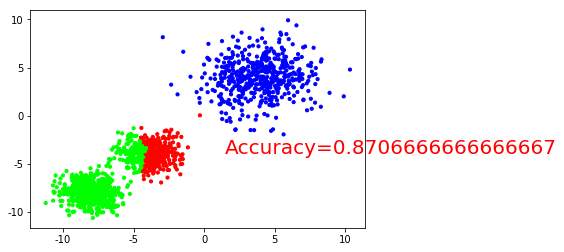

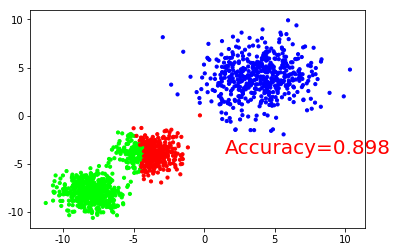

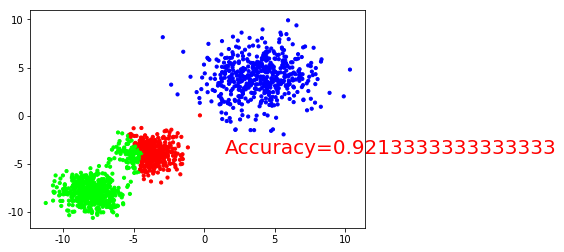

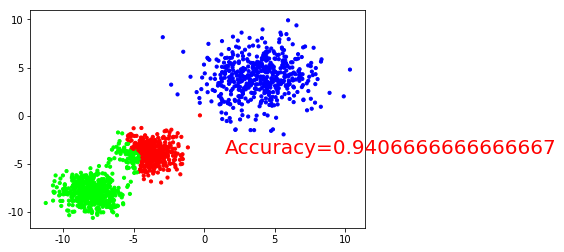

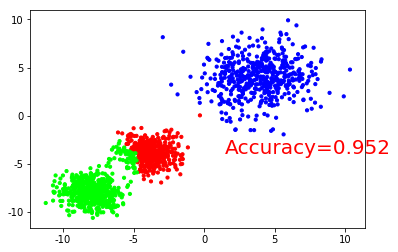

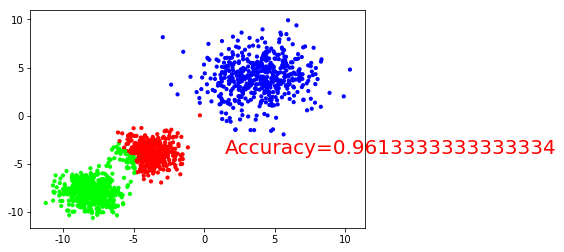

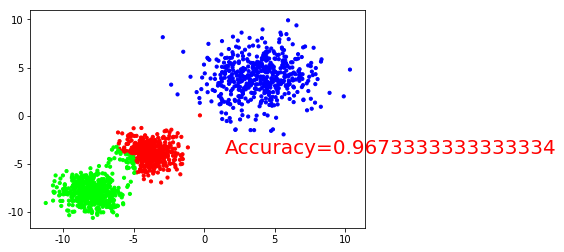

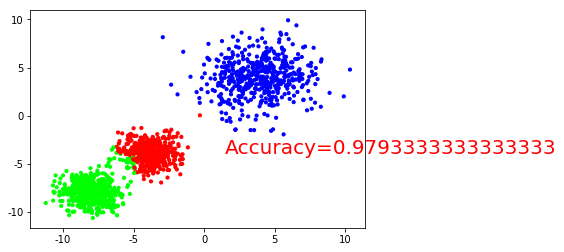

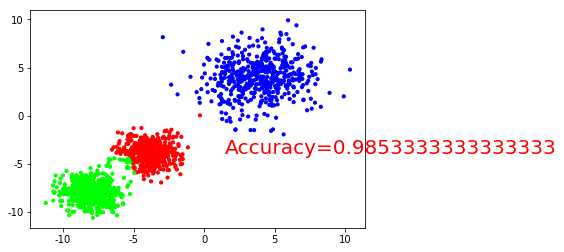

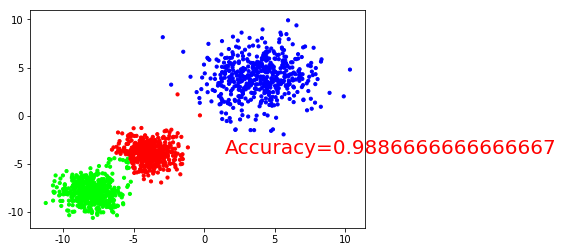

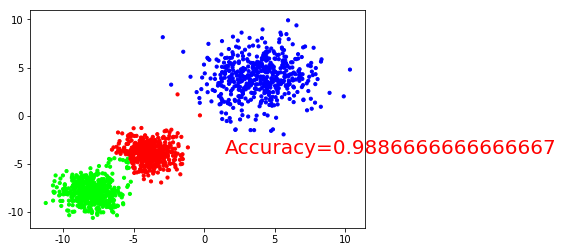

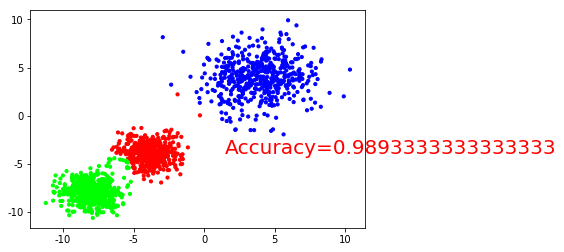

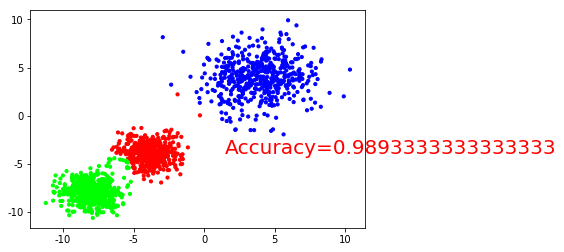

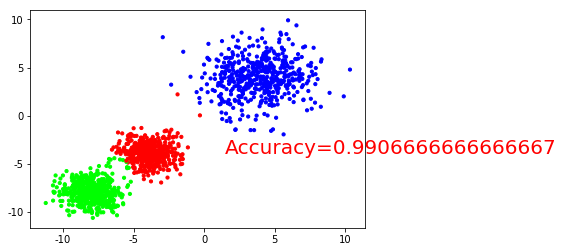

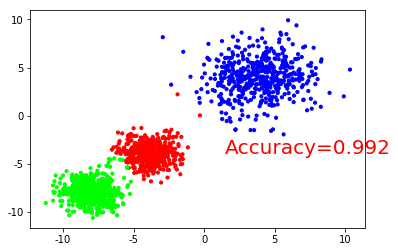

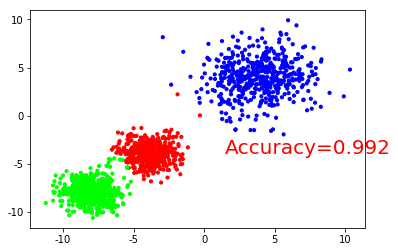

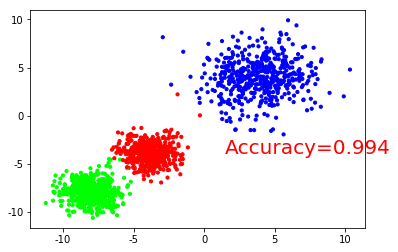

In [16]:
model, loss, output = train(inputs, target, model, 1000)